In [2]:
pip install pytrends


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install requests[socks]

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pytrends.request import TrendReq

In [33]:
pytrends = TrendReq(hl='fr-FR', tz=360)
pytrends.build_payload(['e-commerce'], cat=0, timeframe='2020-01-10 2020-11-10',  gprop='', geo='FR')
#Après geo, nous pouvons ajouter des abréviations de pays et de régions, par exemple, New York est 'US-NY'


In [31]:
df = pytrends.interest_over_time()
print(df.head())
#head(n=x) Contrôlez le nombre de lignes affichées, n est égal à cinq par défaut.

            e-commerce  isPartial
date                             
2020-01-12          42      False
2020-01-19          29      False
2020-01-26          40      False
2020-02-02          38      False
2020-02-09          37      False


Text(0.5, 0, 'Date')

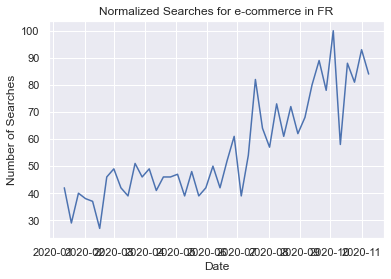

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df['timestamp'] = pd.to_datetime(df.index)
sns.lineplot(df['timestamp'], df['e-commerce'])
plt.title("Normalized Searches for e-commerce in FR")
plt.ylabel("Number of Searches")
plt.xlabel("Date")

In [34]:
def get_searches(key_word, state):
    pytrends = TrendReq(hl='fr-FR', tz=360)
    pytrends.build_payload([key_word], cat=0, timeframe='2019-11-10 2020-11-10',  gprop='',geo='US-{}'.format(state))
    #Besoin de connaître l’abréviation de la région française, mais je ne sais pas, alors j’utilise plutôt les États-Unis.
    df = pytrends.interest_over_time()


    print(df.head())

    sns.set()
    df['timestamp'] = pd.to_datetime(df.index)
    sns.lineplot(df['timestamp'], df[key_word])

    plt.title("Normalized Searches for {} in {}".format(key_word, state))
    plt.ylabel("Number of Searches")
    plt.xlabel("Date")

            e-commerce  isPartial
date                             
2019-11-10          41      False
2019-11-17          44      False
2019-11-24          69      False
2019-12-01          56      False
2019-12-08          32      False
            e-commerce  isPartial
date                             
2019-11-10          39      False
2019-11-17          65      False
2019-11-24          56      False
2019-12-01          52      False
2019-12-08          78      False
            e-commerce  isPartial
date                             
2019-11-10          41      False
2019-11-17          47      False
2019-11-24          29      False
2019-12-01          56      False
2019-12-08          31      False


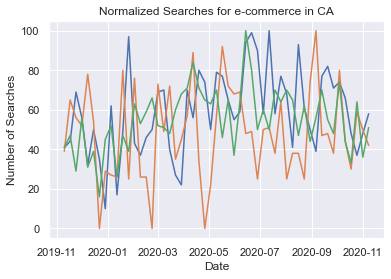

In [35]:
get_searches('e-commerce', 'NY')
get_searches('e-commerce', 'MA')
get_searches('e-commerce', 'CA')
#Utilisez les fonctions pour connaître les données des trois régions.